# EMPLOYEE SALARIES FOR DIFFERENT JOB ROLES

# Data Science Salaries Trends 2020 - 2022


# Importing Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading The Data Set

In [84]:
ds=pd.read_csv(r'C:\Users\Admin\OneDrive\Desktop\data analytics\EMPLOYEE SALARIES FOR DIFFERENT JOB ROLES\ds_salaries.csv')

In [24]:
ds.head(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [25]:
ds.shape

(607, 12)

In [26]:
ds.describe(include = 'all')

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,607.000000,607.000000,607,607,607,6.070000e+02,607,607.000000,607,607.00000,607,607
unique,NaN,NaN,4,4,50,NaN,17,NaN,57,NaN,50,3
top,NaN,NaN,SE,FT,Data Scientist,NaN,USD,NaN,US,NaN,US,M
freq,NaN,NaN,280,588,143,NaN,398,NaN,332,NaN,355,326
mean,303.000000,2021.405272,NaN,NaN,NaN,3.240001e+05,NaN,112297.869852,NaN,70.92257,NaN,NaN
std,175.370085,0.692133,NaN,NaN,NaN,1.544357e+06,NaN,70957.259411,NaN,40.70913,NaN,NaN
min,0.000000,2020.000000,NaN,NaN,NaN,4.000000e+03,NaN,2859.000000,NaN,0.00000,NaN,NaN
25%,151.500000,2021.000000,NaN,NaN,NaN,7.000000e+04,NaN,62726.000000,NaN,50.00000,NaN,NaN
50%,303.000000,2022.000000,NaN,NaN,NaN,1.150000e+05,NaN,101570.000000,NaN,100.00000,NaN,NaN
75%,454.500000,2022.000000,NaN,NaN,NaN,1.650000e+05,NaN,150000.000000,NaN,100.00000,NaN,NaN


# Understand the dataset
work_year: The data set contains information for 3 years. [2020, 2021, 2022]

employment_type: The type of employement for the role. PT = Part-time,FT= Full-time,CT = Contract

job_title: The role worked in during the year. Data Scientist Data Engineer Machine Learning Scientist Big Data Engineer Data Analyst

salary: The total gross salary amount paid in USD.

employee_residence: Employee's primary country of residence in during the work year. US GB FR TR DE ..

remote_ratio: The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)

company_location: The country of the employer's main office or contracting branch. DE JP HN US ..

Company_size: The average number of people that worked for the company during the year. S (Small) < 50 50 < M (Medium) < 250 250 < L (Large)

In [27]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [28]:
ds.shape

(607, 12)

In [29]:
ds.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [30]:
ds.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [31]:
ds.drop(columns = ['Unnamed: 0', 'salary', 'salary_currency'], inplace = True)

In [32]:
ds.head(5)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


# Changing the encoding of a few of the categorical columns to better understand the information they are trying to convey

In [33]:
print(ds['experience_level'].unique())
print(ds['employment_type'].unique())
print(ds['company_size'].unique())
print(ds['remote_ratio'].unique())

['MI' 'SE' 'EN' 'EX']
['FT' 'CT' 'PT' 'FL']
['L' 'S' 'M']
[  0  50 100]


# replacing the values

In [34]:
ds['experience_level'] = ds['experience_level'].map({'EN': 'Entry-Level', 'MI': 'Mid-Level', 'SE': 'Senior-Level', 'EX': 'Executive-Level'})
ds['employment_type'] = ds['employment_type'].map({'FT':'Full-time', 'CT':'Contract', 'PT':'Part-time', 'FL':'Full-time'})
ds['company_size'] = ds['company_size'].map({'L':'Large', 'S':'Small', 'M':'Medium'})
ds['remote_ratio'] = ds['remote_ratio'].map({0:'On-site', 50:'Hybrid', 100:'Remote'})

In [36]:
ds.head(5)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-Level,Full-time,Data Scientist,79833,DE,On-site,DE,Large
1,2020,Senior-Level,Full-time,Machine Learning Scientist,260000,JP,On-site,JP,Small
2,2020,Senior-Level,Full-time,Big Data Engineer,109024,GB,Hybrid,GB,Medium
3,2020,Mid-Level,Full-time,Product Data Analyst,20000,HN,On-site,HN,Small
4,2020,Senior-Level,Full-time,Machine Learning Engineer,150000,US,Hybrid,US,Large


In [38]:
ds.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

# Let us first try to understand the salary ranges at different experience levels

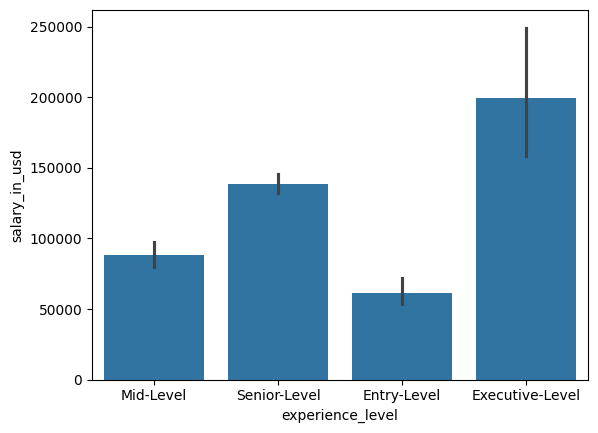

In [39]:
sns.barplot(x = 'experience_level', y = 'salary_in_usd', data = ds);

In [46]:
job_title = pd.DataFrame(ds['job_title'].value_counts().reset_index()) # This function resets the index of the resulting Series.

In [47]:
job_title.columns = ['designation', 'count']

In [48]:
job_title.head()

,designation,count
0,Data Scientist,143
1,Data Engineer,132
2,Data Analyst,97
3,Machine Learning Engineer,41
4,Research Scientist,16


In [49]:
job_title.loc[6.5] = ['Others', job_title['count'][7:].sum()]
job_title.head(10)

,designation,count
0.0,Data Scientist,143
1.0,Data Engineer,132
2.0,Data Analyst,97
3.0,Machine Learning Engineer,41
4.0,Research Scientist,16
5.0,Data Science Manager,12
6.0,Data Architect,11
7.0,Big Data Engineer,8
8.0,Machine Learning Scientist,8
9.0,Principal Data Scientist,7


In [50]:
job_title = job_title.sort_index().reset_index(drop = True)

In [51]:
job_title.head(10)

,designation,count
0,Data Scientist,143
1,Data Engineer,132
2,Data Analyst,97
3,Machine Learning Engineer,41
4,Research Scientist,16
5,Data Science Manager,12
6,Data Architect,11
7,Others,155
8,Big Data Engineer,8
9,Machine Learning Scientist,8


In [52]:
job_title['count'][:8]

0    143
1    132
2     97
3     41
4     16
5     12
6     11
7    155
Name: count, dtype: int64

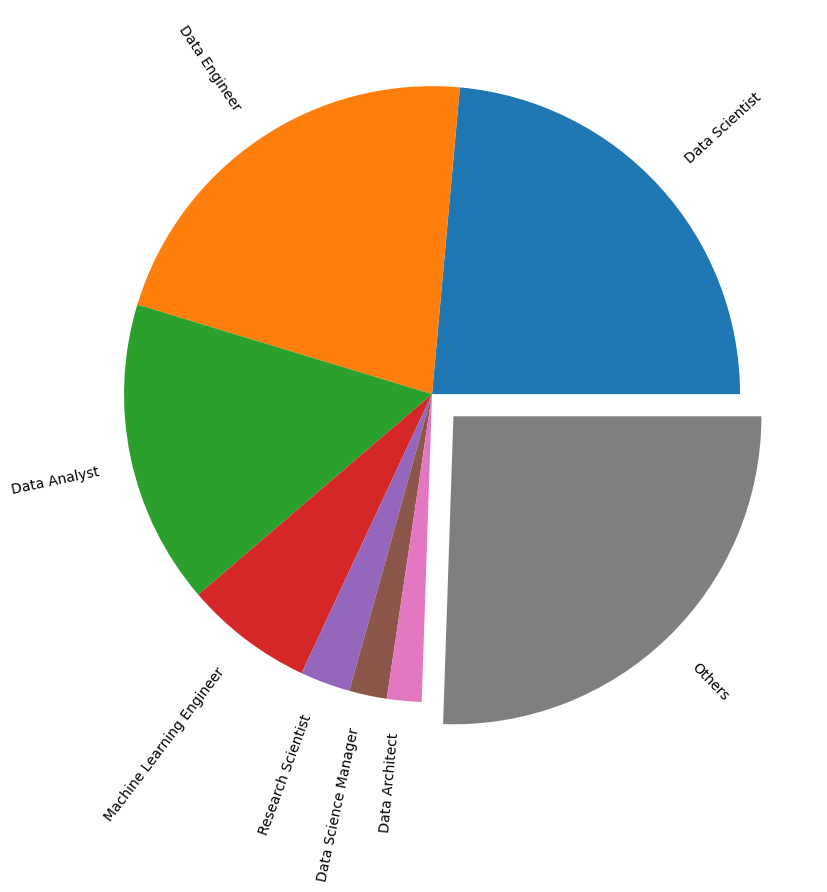

In [55]:
plt.figure(figsize=(10, 10))
exp = (0, 0, 0, 0, 0, 0, 0, 0.1)
plt.pie(job_title['count'][:8], labels=job_title['designation'][:8], rotatelabels=270, explode=exp)
plt.show()

# Now let us drop the duplicated rows and see if the the trend/spread of salaries among employees at different experience levels remain the same across years

In [56]:
ds.duplicated().value_counts()

False    565
True      42
Name: count, dtype: int64

In [57]:
ds.drop_duplicates(inplace = True)

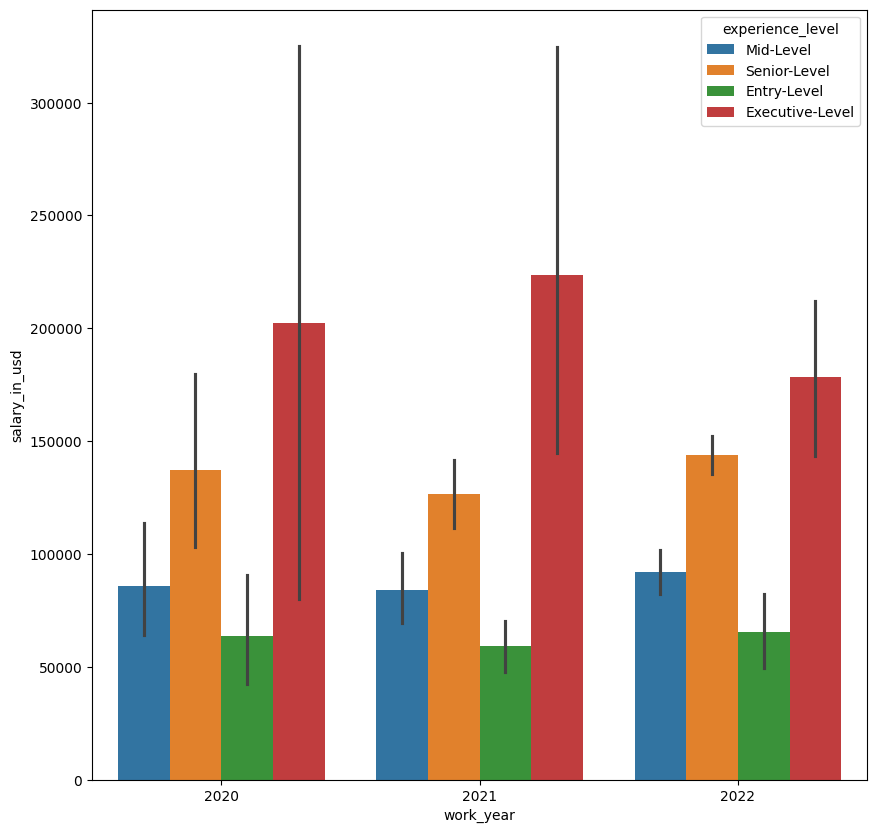

In [58]:
plt.figure(figsize = (10, 10))
sns.barplot(x='work_year',y='salary_in_usd',hue='experience_level',data=ds);

<Axes: xlabel='company_size', ylabel='count'>

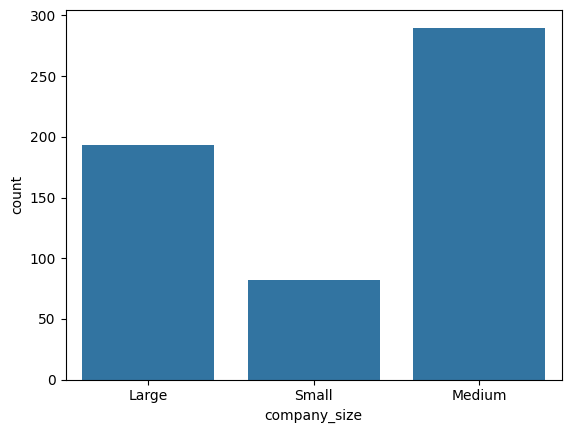

In [60]:
sns.countplot(data=ds,x='company_size')

<Axes: xlabel='salary_in_usd'>

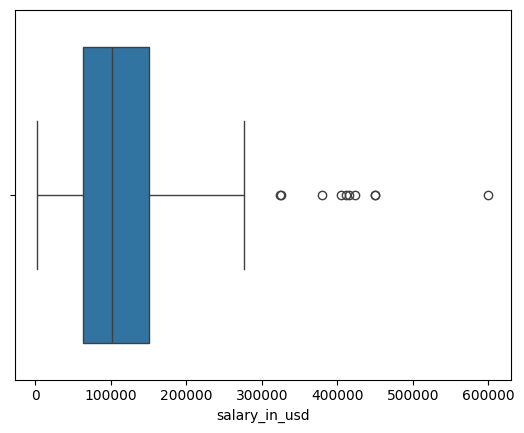

In [85]:
sns.boxplot(x=ds['salary_in_usd'])

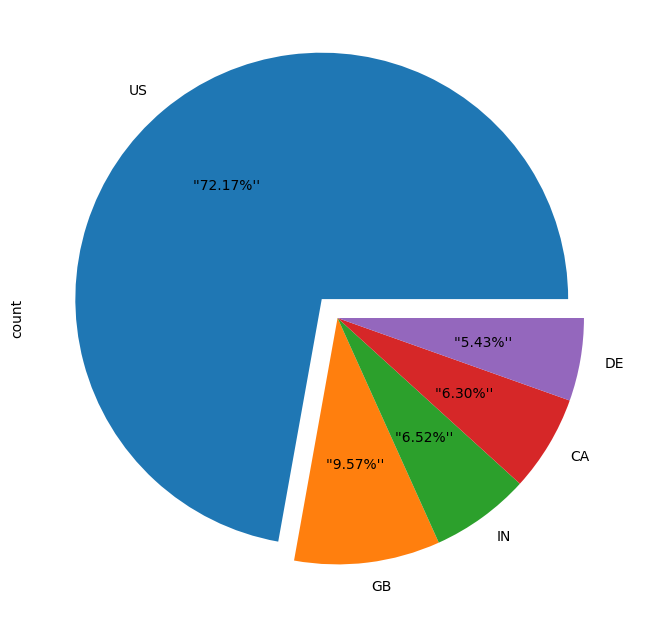

In [87]:
emp_res = ds['employee_residence'].value_counts().head(5)
plt.figure(figsize=(8,8))
emp_res.plot(kind='pie',autopct="''%1.2f%%''",explode=(0.1, 0, 0, 0, 0));